In [1]:
from __future__ import print_function

import histomicstk as htk

import numpy as np
import scipy as sp

import skimage.io
import skimage.measure
import skimage.color

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

#Some nice default configuration for plots
plt.rcParams['figure.figsize'] = 15, 15
plt.rcParams['image.cmap'] = 'gray'
titlesize = 24


In [2]:
!pip install  histomicstk --user

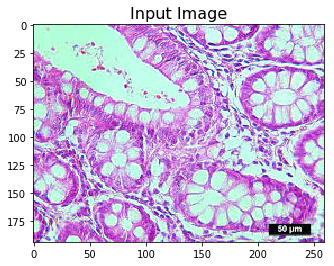

In [3]:
inputImageFile = ('/home/gutmanlab/Downloads/papers/colon.jpeg')  # H&E.png

imInput = skimage.io.imread(inputImageFile)[:, :, :3]

plt.imshow(imInput)
_ = plt.title('Input Image', fontsize=16)

In [4]:
imInput.shape

(194, 259, 3)

In [37]:
imInput[0,258,:]

Array([212, 246, 230], dtype=uint8)

In [38]:
imInput[1,0,:]

Array([180, 255, 216], dtype=uint8)

In [5]:
x, y, z = imInput.shape

image_2d = imInput.reshape(x*y, z)

image_2d.shape

(50246, 3)

In [ ]:
for i in range(0,1453):

In [19]:
from sklearn import cluster

In [20]:
kmeans_cluster = cluster.KMeans(n_clusters=3)

kmeans_cluster.fit(image_2d)

cluster_centers = kmeans_cluster.cluster_centers_

cluster_labels = kmeans_cluster.labels_

In [21]:
cluster_labels.shape

(50246,)

In [26]:
c1=np.asarray(cluster_labels)

In [30]:
c2=c1.reshape(50246,1)

In [31]:
c2.shape

(50246, 1)

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA(n_components=1)
pca.fit(image_2d)
X_pca = pca.transform(image_2d)
print("original shape:   ",image_2d.shape)
print("transformed shape:", X_pca.shape)

original shape:    (50246, 3)
transformed shape: (50246, 1)


In [34]:
np.savetxt('/home/gutmanlab/Downloads/papers/image_2d_Xpca.csv', result1,delimiter=',')

In [46]:
import numpy as np
result = np.concatenate((image_2d,X_pca),axis=1)
result1=np.concatenate((X_pca,c2),axis=1)
print(result1)


[[-67.51196471   0.        ]
 [-67.51196471   0.        ]
 [-67.51196471   0.        ]
 ...
 [187.00607788   2.        ]
 [160.55345417   2.        ]
 [140.95411167   2.        ]]


In [47]:
resul2 =result1.reshape(194,259,2)

In [50]:
resul2.shape

(194, 259, 2)

In [52]:
resul2[0,0,0]

-67.51196470968203

In [48]:
resul2

array([[[-67.51196471,   0.        ],
        [-67.51196471,   0.        ],
        [-67.51196471,   0.        ],
        ...,
        [-73.54844224,   0.        ],
        [-73.56375913,   0.        ],
        [-73.57907603,   0.        ]],

       [[-67.51196471,   0.        ],
        [-67.51196471,   0.        ],
        [-67.51196471,   0.        ],
        ...,
        [-70.32140708,   0.        ],
        [-70.58673542,   0.        ],
        [-69.96348219,   0.        ]],

       [[-67.51196471,   0.        ],
        [-67.51196471,   0.        ],
        [-67.51196471,   0.        ],
        ...,
        [-66.72113014,   0.        ],
        [-67.57107188,   0.        ],
        [-67.7671266 ,   0.        ]],

       ...,

       [[116.88732382,   2.        ],
        [ 43.54226342,   1.        ],
        [ 63.66251476,   1.        ],
        ...,
        [161.21402402,   2.        ],
        [ 63.36661979,   2.        ],
        [-46.34714092,   0.        ]],

       [[ 84.00

In [65]:
clust0_x=[]
clust0_y=[]
clust0_pca=[]
clust1_x=[]
clust1_y=[]
clust1_pca=[]
clust2_x=[]
clust2_y=[]
clust2_pca=[]
for i in range(0,194):
    for j in range(0,259):
        if(resul2[i,j,1]==0):clust0_x.append(i), clust0_y.append(j),clust0_pca.append(resul2[i,j,0])
        if(resul2[i,j,1]==0):clust1_x.append(i), clust1_y.append(j),clust1_pca.append(resul2[i,j,0])
        if(resul2[i,j,1]==0):clust2_x.append(i), clust2_y.append(j),clust2_pca.append(resul2[i,j,0])    

In [66]:
clust0_pca

[-67.51196470968203,
 -67.51196470968203,
 -67.51196470968203,
 -67.51196470968203,
 -67.51196470968203,
 -67.51196470968203,
 -67.51196470968203,
 -67.51196470968203,
 -66.49660203342587,
 -63.373025051721896,
 -64.5269349557533,
 -67.33122687789812,
 -65.90798561482137,
 -50.844984803047694,
 -53.42944682411824,
 -58.09904316056144,
 -65.6848478795885,
 -65.6848478795885,
 -65.6848478795885,
 -65.6848478795885,
 -65.6848478795885,
 -65.6848478795885,
 -65.6848478795885,
 -65.6848478795885,
 -65.13086826792781,
 -65.13086826792781,
 -65.13086826792781,
 -65.13086826792781,
 -65.13086826792781,
 -65.13086826792781,
 -65.13086826792781,
 -65.13086826792781,
 -64.6037623667058,
 -65.24233248582411,
 -65.59625435232708,
 -63.52312909636583,
 -58.468977106279624,
 -54.32272659435711,
 -52.86885154414035,
 -51.34570288003597,
 -65.96949613220386,
 -65.96949613220386,
 -65.96949613220386,
 -65.96949613220386,
 -65.96949613220386,
 -65.96949613220386,
 -65.96949613220386,
 -65.96949613220386,

In [95]:
clst0_xy_pca=np.vstack((clust0_x, clust0_y,clust0_pca)).T

In [96]:
clst0_xy_pca.shape

(24473, 3)

In [97]:
clst0_xy_pca

array([[   0.        ,    0.        , -102.55962603],
       [   0.        ,    1.        , -102.55962603],
       [   0.        ,    2.        , -102.24034097],
       ...,
       [ 193.        ,  251.        ,    9.35344668],
       [ 193.        ,  252.        ,   15.2280204 ],
       [ 193.        ,  253.        ,   16.65060013]])

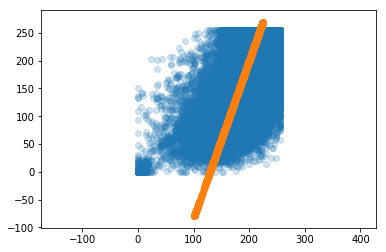

In [13]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(image_2d[:, 0], image_2d[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

In [73]:
clust0_pca1=np.asarray(clust0_pca)

In [80]:
clust0_pca1

array([-102.55962603, -102.55962603, -102.24034097, ...,    9.35344668,
         15.2280204 ,   16.65060013])

In [98]:
np.savetxt('/home/gutmanlab/Downloads/papers/clustxy_pca.csv', clst0_xy_pca,delimiter=',')

In [81]:
clust0_pca2=np.sort(clust0_pca1)

In [82]:
clust0_pca2

array([-102.55962603, -102.55962603, -102.24034097, ...,    9.35344668,
         15.2280204 ,   16.65060013])

In [83]:
min(clust0_pca2),max(clust0_pca2)

(-102.55962602861757, 16.65060012555564)

In [99]:
clst0_xy_pca.shape

(24473, 3)

In [101]:
min(clust0_pca),max(clust0_pca)

(-102.55962602861757, 16.65060012555564)

In [102]:
range0=max(clust0_pca)- min(clust0_pca)

In [106]:
int(range0)

119

In [ ]:
for i in range(1,24473):
    if(clst0_xy_pca[:,2]<-132)
    